<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_09/blob/1.5v2/Coursework_question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing & Numerical Methods Coursework Group 9
By: Ching Yau Chan, Hassan Alhamdani, Jiongjie Chen, Lucas So and Oyinmiebi Youdeowei

# Test 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #mathplot is used to make a 'figure' where the ax graph can be mapped onto.
import matplotlib.animation


#These are the inputs that act as parameters that allow the user to specify model domain, resolution, and boundary conditions at the edge of the domain
end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
concentration_at_x0_past = float(input("initial_concentration_at_x0, in μg/m^3   "))

distance = np.array([]) #Creates an empty array to hold 'distance' values
for i in range(int(length / length_interval+1)): #This calculates how many steps in distance that can fit within the interval and loops that many times
  distance = np.append(distance , length_interval * i ) #Adds the calculated values for distance step into the 'distance' array

initial_conditions = np.zeros(int(length / length_interval+1)) #Creates an empty array the size of number of steps in distance
initial_conditions[0] = concentration_at_x0_past #Sets the first value in the 'initial_conditions' array to inputted initial pollution level

#fig creates a blank picture frame which draws on the co-ordinate system 'ax' so colab doesn't get confused which graph to output
fig, ax = plt.subplots()

#The A and B values are calculated here, to simplify the calculation to find the new level of pollution using a rearrangement of the advection equation
A_value = 1/time_interval + speed / length_interval
B_value = speed / length_interval

#These create empty arrays for A and B
A_array = np.array([])
B_array = np.array([])

#This adds the 'A-values' to the 'A_array' and the 'B-values' to the 'B_array' multiple times (the number of steps there are in the distance)
for i in range(int(length / length_interval +1)):
  A_array = np.append(A_array, A_value)
  B_array = np.append(B_array, B_value)

num_frames = (int(end_time / time_interval)+1)

# Make a copy of initial_conditions that will be updated at each time step
current_initial_conditions = initial_conditions.copy()

# Initialize a list to store all concentration profiles for animation
all_concentrations = [initial_conditions.copy()]

#This calculates and loops by the number of steps in time
for k in range(1,num_frames):
  concentration_present = np.zeros(int(length / length_interval+1))
  concentration_present[0] = concentration_at_x0_past # The boundary condition at x=0

  #Calculating the concentration for the current time step
  for i in range(1,int(length / length_interval)+1):
    concentration_present[i]=(current_initial_conditions[i] / time_interval + B_array[i]*concentration_present[i-1]) / A_array[i]

  current_initial_conditions = concentration_present.copy()
  # Store the current concentration profile
  all_concentrations.append(concentration_present.copy())



# Set some attributes of the animation object
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()  # interactive off

# setting function for plotting
def animate(f):
    ax.cla()  # Clearing prevoius plot

    # Retrieve the correct concentration profile for the current frame
    concentration = all_concentrations[f]

    # Draw the plot on ax
    ax.plot(distance, concentration)

    # Set axis limits and labels on ax
    ax.set_xlim(0, length)
    ax.set_ylim(0, concentration_at_x0_past * 1.1)
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Concentration (μg/m³)")
    ax.set_title(f"Concentration at Time = {f * time_interval:.1f} s")
    ax.grid(True)


# Create the animation
matplotlib.animation.FuncAnimation(fig, animate, frames=num_frames)

How long should the model last for, in seconds  300
The time interval, in seconds   10
Length of model, in metres   20
The length interval, in metres   0.2
Speed of river flow, in m/s   0.1
initial_concentration_at_x0, in μg/m^3   250


# Test 1.3

# Test 1.4

# Test 1.5

How long should the model last for, in seconds  300
The time interval, in seconds   10
Length of model, in metres   20
The length interval, in metres   0.2
Speed of river flow, in m/s   0.1
The minimum and maximum of random perturbation of the stream, in percentages   35
Initial concentration at x0, in μg/m³   250


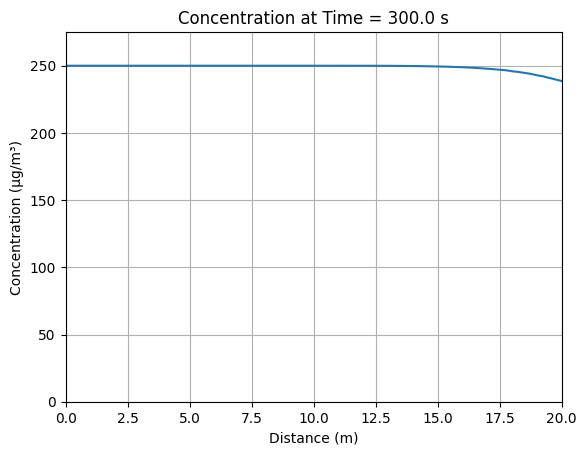

In [1]:
import numpy as np
import matplotlib.pyplot as plt #mathplot is used to make a 'figure' where the ax graph can be mapped onto.
import matplotlib.animation


#These are the inputs that act as parameters that allow the user to specify model domain, resolution, and boundary conditions at the edge of the domain
end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
random_perturbation = float(input("The minimum and maximum of random perturbation of the stream, in percentages   "))
concentration_at_x0_past = float(input("Initial concentration at x0, in μg/m³   "))

distance = np.array([]) #Creates an empty array to hold 'distance' values
for i in range(int(length / length_interval+1)): #This calculates how many steps in distance that can fit within the interval and loops that many times
  distance = np.append(distance , length_interval * i ) #Adds the calculated values for distance step into the 'distance' array

initial_conditions = np.zeros(int(length / length_interval+1)) #Creates an empty array the size of number of steps in distance
initial_conditions[0] = concentration_at_x0_past #Sets the first value in the 'initial_conditions' array to inputted initial pollution level

#fig creates a blank picture frame which draws on the co-ordinate system 'ax' so colab doesn't get confused which graph to output
fig, ax = plt.subplots()

num_frames = (int(end_time / time_interval)+1)

# Make a copy of initial_conditions that will be updated at each time step
current_initial_conditions = initial_conditions.copy()

# Initialize a list to store all concentration profiles for animation
all_concentrations = [initial_conditions.copy()]

#This calculates and loops by the number of steps in time
for k in range(1,num_frames):
  concentration_present = np.zeros(int(length / length_interval+1))
  concentration_present[0] = concentration_at_x0_past # The boundary condition at x=0

  #Emulating variable speed with a factor between 1 +- random perturbation,
  random_variable = np.random.random((int(length / length_interval+1)))
  random_speed = (1 - random_perturbation/100 + random_perturbation/50 * random_variable) * speed

  #Random speed affects A and B values
  A_value = 1/time_interval + random_speed / length_interval
  B_value = random_speed / length_interval

  #Calculating the concentration for the current time step
  for i in range(1,int(length / length_interval)+1):
    concentration_present[i]=(current_initial_conditions[i] / time_interval + B_value[i-1]*concentration_present[i-1]) / A_value[i-1]

  current_initial_conditions = concentration_present.copy()
  # Store the current concentration profile
  all_concentrations.append(concentration_present.copy())



# Set some attributes of the animation object
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()  # interactive off

# setting function for plotting
def animate(f):
    ax.cla()  # Clearing prevoius plot

    # Retrieve the correct concentration profile for the current frame
    concentration = all_concentrations[f]

    # Draw the plot on ax
    ax.plot(distance, concentration)

    # Set axis limits and labels on ax
    ax.set_xlim(0, length)
    ax.set_ylim(0, concentration_at_x0_past * 1.1)
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Concentration (μg/m³)")
    ax.set_title(f"Concentration at Time = {f * time_interval:.1f} s")
    ax.grid(True)


# Create the animation
matplotlib.animation.FuncAnimation(fig, animate, frames=num_frames)

# Test 2

# Test 2.3

# Test 2.4

# Test 2.5